# Homework 4

Before you run your homework run the code below:

In [37]:
import os
import sys
import hashlib
import pandas as pd
import numpy as np
from urllib.request import urlopen

assert os.path.exists('../homeworks/HW4.ipynb')

info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/hw-4-'+name,'w') as f:
    f.write(info)

In [38]:
with open('../other/hw-4-'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/hw-4-'+name)

## Task

Apply all of the supervised and unsupervised classification and clustering algorithms we learned so far for the [sonar dataset from UCI](http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)).

The code for downloading the data is below. Don't load the data again and again in each subtask, refer the data as `SONAR` after you run the cell below.

In [39]:
with urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data") as fil:
    SONAR = pd.read_csv(fil, delimiter=',', header=None)

Split the tasks into subtasks and into separate cells.  Also before your analysis for each subtask, write a short paragraph before explaining which algorithm you are going to use. Each subtask should look like this

## Subtask n: Algorithm name

Some explanation as to what you are going to do.

Necessary libraries and functions will be imported below.

In [173]:
import sklearn.metrics as mt 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import fcluster

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

## First algorithm: K-NN Classification

I am going to start from K-NN classicication since this is actually a classification problem.

First I am going to split the data for testing and training.

In [126]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(SONAR.iloc[:,0:60], SONAR.iloc[:,60], test_size = 0.25, train_size = 0.75)

Then I am going to apply K-NN classification to our test data.

In [50]:
model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean').fit(Xtrain, Ytrain)
predictions =  model.predict(Xtest)

Lets calculate accuracy and confusion matrix

In [51]:
cm = confusion_matrix(Ytest, predictions)
accuracy = mt.accuracy_score(Ytest, predictions)

print(confusion_matrix(Ytest,predictions))
print(accuracy)

[[23  5]
 [ 7 17]]
0.7692307692307693


## Second Algorithm - K-Means Clustering

Secondly, I am going to use K-Means clustering algorithm. Since this is an unsupervised learning algorithm, most likely we will get a worse result rather than K-NN.

Lets split our data to train and test

In [58]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size = 0.25, train_size = 0.75)

Then create construct our prediction model. We will choose number of clusters; since we are trying to separate amongst rocks and mines, number of clusters should be 2. Then we will create predictions and train our data, then get a confusion matrix and accuracy score.

In [59]:
classifier = KMeans(n_clusters=2,random_state=1)
classifier.fit(Xtest)
predicted = classifier.predict(Xtest)
labels = {"R":0, "M":1}
real = Ytest.map(lambda x: labels[x])

Results are printed below. Clearly K-Means algorithm gives worse result rather than K-NN algorithm.

In [61]:
print(confusion_matrix(real,predicted))
accuracy = mt.accuracy_score(real, predicted)
accuracy

[[12 14]
 [11 15]]


0.5192307692307693

# Third Algorithm - Hierarchical Clustering

Now we will use Hierarchical Clustering. This algorithm is going to consider all data points as a cluster instance, then it will start to unite closest clusters to each other. Then we will get a new set of clusters that has two data points in it. This will go on until there is one cluster left, then we can observe how accurate will this algorithm work.

Lets create our clusters and show it on dendogram.

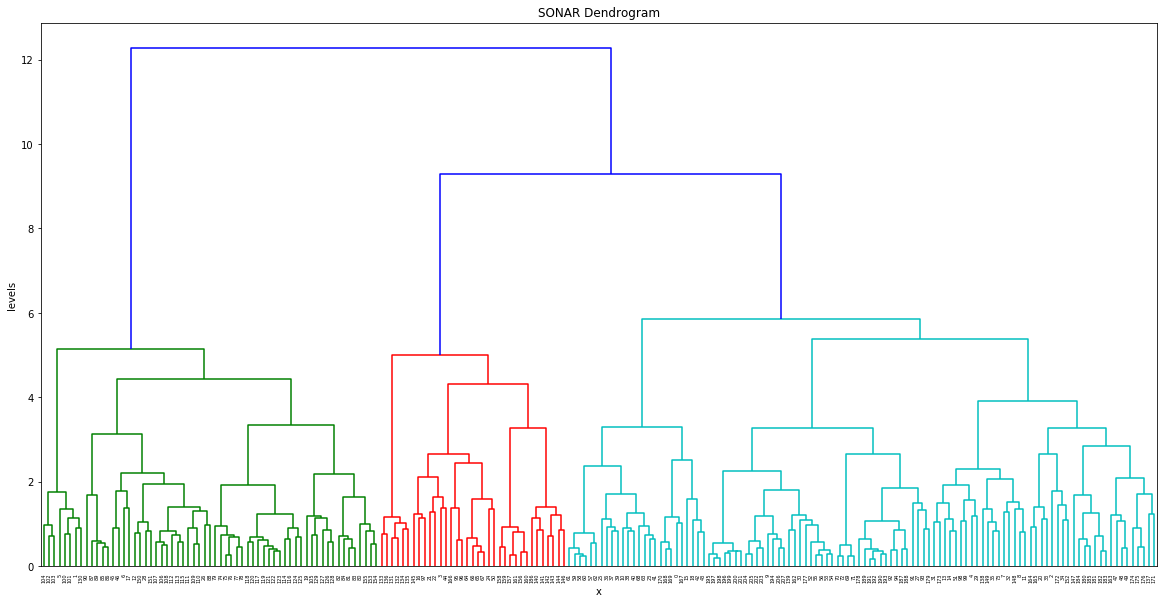

In [141]:
plt.figure(figsize=(20, 10))
plt.title('SONAR Dendrogram')
plt.xlabel('x')
plt.ylabel('levels')
dendrogram(linkage(xs, 'ward'))
plt.show()

In [113]:
predicted = fcluster(Z ,2, criterion='maxclust')

labels1 = {"M":2, "R":1}
real = ys.map(lambda x: labels1[x])

NameError: name 'Z' is not defined

I am going to grade your homework both on correctness of the code and the organization of the text.

In [114]:
print(confusion_matrix(real,predicted))
mt.accuracy_score(real,predicted)

[[12 14]
 [11 15]]


0.5192307692307693

As we can see, Hierchical Clustering is a "clustering algorithm", so results are not as good as classification algorithm

# Fourth Algorithm - Logistic Regression

Next, I am going to use Logistic Regression algorithm. We will classify our data with using a logistic function by the value of their probability on a space.

First I am going to use LogisticRegression from sklearn linear model.

In [135]:
clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr').fit(Xtrain, Ytrain)
predictions = clf.predict(Xtest)

After training our model, let's print out accuracy and our confusion matrix and compare the results.

In [165]:
cm = confusion_matrix(Ytest, predictions)
accuracy = mt.accuracy_score(Ytest, predictions)
print(confusion_matrix(Ytest,predictions))
print(accuracy)

[[21 10]
 [ 2 19]]
0.7692307692307693


60

Logistic regression algorithm also had a good accuracy percentage.

# Fifth Algorithm - Gaussian Naive Bayes


Lets apply Gaussian Naive Bayes Algorithm, and train it with our data.

In [174]:
gnb = GaussianNB()
predictions = gnb.fit(Xtrain, Ytrain).predict(Xtest)


Then print the result.

In [175]:
cm = confusion_matrix(Ytest, predictions)
accuracy = mt.accuracy_score(Ytest, predictions)
print(confusion_matrix(Ytest,predictions))
print(accuracy)

[[21 10]
 [ 2 19]]
0.7692307692307693
